# Data science group 69 project 

## Project Goal:
We are going to use the bus opal data from Transport NSW to predict the number of passengers for each month if COVID-19 did not happen. We will also then compare this data with the actual number of passengers during the COVID-19 period.

## Data Source and Background:
The dataset we will be using comes from the Transport for NSW website, which has several different types of data available about its services. We will be using the Monthly Opal Bus Trips by Contract Area data, which contains information about opal card usage within the bus system throughout Sydney. 

#### Import the methods

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")


#### Data Cleaning

In [2]:
# read the dataset
data = pd.read_csv("Untitled Folder/Bus Card Type.xlsx - Bus Card Type.csv.csv")

In [3]:
## fill the null values with zero, in order to establish the model and plot graphs
data=data.fillna(0)

In [4]:
## converted the Categorical data type of date to a Date type in the Date column 
data['Date'] = pd.to_datetime( data['Date'], 
 format = '%Y-%m',errors = 'coerce')
data.Date.head()

0   2016-07-01
1   2016-08-01
2   2016-09-01
3   2016-10-01
4   2016-11-01
Name: Date, dtype: datetime64[ns]

In [5]:
data.head()

,Month number,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Day Pass without SAF.1,Monthly passengers
0,1,2016-07-01,390433,62800,136064,0.0,1149,138642,206110,0.0,0.0,0.0,0.0,0,935198
1,2,2016-08-01,386386,67010,73590,0.0,1281,296261,224668,0.0,0.0,0.0,0.0,0,1049196
2,3,2016-09-01,370068,70022,61676,0.0,1320,203827,218598,0.0,0.0,0.0,0.0,0,925511
3,4,2016-10-01,381402,78951,60635,0.0,1410,197558,227088,0.0,0.0,0.0,0.0,0,947044
4,5,2016-11-01,405245,76328,57858,0.0,1462,255994,236965,0.0,0.0,0.0,0.0,0,1033852


In [6]:
data.shape

(62, 15)

In [7]:
data.tail(20)

,Month number,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Day Pass without SAF.1,Monthly passengers
42,43,2020-01-01,452466,95311,41589,3015.0,1955,26904,215635,10190.0,72400.0,9.0,120.0,120,919594
43,44,2020-02-01,467925,82827,54455,2941.0,1957,248840,221171,10801.0,79982.0,16.0,150.0,150,1171065
44,45,2020-03-01,392860,59296,58725,2745.0,1535,193275,186468,7789.0,72009.0,24.0,150.0,150,974876
45,46,2020-04-01,171160,16162,13028,1218.0,676,3287,91583,1763.0,37115.0,4.0,93.0,93,336089
46,47,2020-05-01,216827,28396,17912,1424.0,898,64900,118350,2940.0,49688.0,0.0,97.0,97,501432
47,48,2020-06-01,260477,40075,24328,1593.0,1164,166127,145567,4980.0,62234.0,0.0,121.0,121,706666
48,49,2020-07-01,288798,55356,29962,1794.0,1173,89474,158537,6217.0,71847.0,53.0,128.0,128,703339
49,50,2020-08-01,270591,41851,30755,1697.0,1159,148147,150110,5639.0,67871.0,0.0,98.0,98,717918
50,51,2020-09-01,278146,44307,30751,1747.0,1110,128544,158729,6581.0,74706.0,0.0,96.0,96,724717
51,52,2020-10-01,275385,50513,29663,1780.0,1219,93826,162732,6706.0,81315.0,0.0,141.0,141,703280


#### Plot the graph

<AxesSubplot:xlabel='year', ylabel='million'>

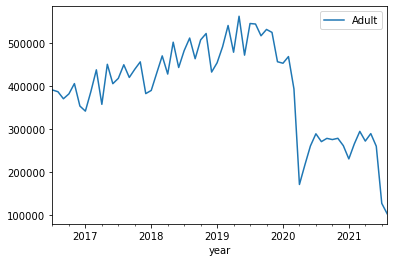

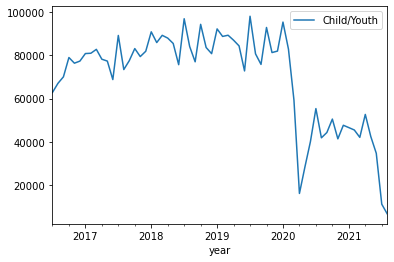

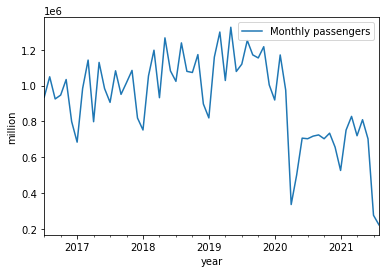

In [8]:
data.plot(x='Date',xlabel='year',y='Adult')
data.plot(x='Date',xlabel='year',y='Child/Youth')
data.plot(ylabel='million',x='Date',xlabel='year',y='Monthly passengers')

In [9]:
before_covid=(data['Monthly passengers'][:44])
print("The total number of average monthly passengers before covid is:\n", before_covid.sum())

The total number of average monthly passengers before covid is:
 45763020


In [10]:
have_covid=(data['Monthly passengers'][44:])
print("The total number of average monthly passengers during covid is:\n", have_covid.sum())

The total number of average monthly passengers during covid is:
 11595381


# Write what we print for next line before_covid.sum()-have_covid.sum()

In [12]:
print(before_covid.sum()-have_covid.sum())

34167639


### Linear Regression

# Help  rewriting for heading

####  compare using one feature and two feature

##### Only use one feature - Month Number

In [13]:
reg = linear_model.LinearRegression()
X = data[['Month number'[:44]]]
y = data['Monthly passengers'[:44]]
reg.fit(X, y)

print("y =X *", reg.coef_, "+", reg.intercept_)

y =X * [-6152.93754879] + 1118953.0327868853


In [14]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)

print("MSE:", mse)
print("R Squared:", r2)

MSE: 46882728949.29938
R Squared: 0.20547118354855975


#### Use two feature - Month Number & Adult

In [15]:
reg = linear_model.LinearRegression()
X = data[['Month number','Adult']]
y = data['Monthly passengers']
reg.fit(X, y)

print("y =X *", reg.coef_, "+", reg.intercept_)

y =X * [-165.81391045    2.11499808] + 99110.49371422525


In [16]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)

print("MSE:", mse)
print("R Squared:", r2)

MSE: 6359288888.733247
R Squared: 0.8922281533632114


# Helpe pls rewords
#### Compare which one is better
using two feature is better Rsquare 0.2>0.89

#### Split the data into two parts:
train - dates before covid
<br>test - period after covid happen and lockdown;

In [17]:
train, test = train_test_split(data, test_size=0.26, random_state=142)
print("The size for train: ", train.shape)
print("The size for test: ", test.shape)

The size for train:  (45, 15)
The size for test:  (17, 15)


### Apply train and test

#### Check we need use Adult or Child/Youth

#####  for Child/Youth

In [ ]:
# Asign the train and test
X_train = train[['Month number','Child/Youth']]
y_train = train['Monthly passengers']
X_test =test[['Month number','Child/Youth']]
y_test = test['Monthly passengers']
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# get prediction
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

#####  for Adult

In [ ]:
# Asign the train and test
X_train = train[['Month number','Adult']]
y_train = train['Monthly passengers']
X_test =test[['Month number','Adult']]
y_test = test['Monthly passengers']
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# get prediction
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

In [ ]:
y_hat_train=reg.predict(X_train)
y_hat_train

# help: rewords
Comparison between predicted data based on adult and child/youth:
<br>
From the correlation coefficient we got from the calculation, the R squared value for using child/youth is 0.74 and for the adult values it is 088. As higher R-squared value indictes a better fit for the model, we diceded to use adult to fit with our model.

#### Result

In [ ]:
## monthly passengers number during the covid period assuming there's no covid in NSW
MonthlyPassengerNoCovid=reg.predict(X_test)
print(len(MonthlyPassengerNoCovid))
MonthlyPassengerNoCovid

In [ ]:
## change monthly passengers number during actual covid period into array
ActualMonthlyPassengers = np.asarray(data['Monthly passengers'][45:])
ActualMonthlyPassengers

In [ ]:
## change covid period date into array 
HavingCovidPeriod = np.asarray(data['Date'][45:])
HavingCovidPeriod

In [ ]:
## create a table that contain covid period date, actual covid data and predicted covid period data
pd.set_option('display.float_format', lambda x: '%.0f' % x)
CompareMonthlyPassengers = pd.DataFrame({'Date':HavingCovidPeriod,'Have COVID':ActualMonthlyPassengers,'No COVID(Prediceted)':MonthlyPassengerNoCovid})
CompareMonthlyPassengers

In [ ]:
CompareMonthlyPassengers.plot(kind = 'bar', x = 'Date',title = 'comparison of Monthly Passengers')

In [ ]:
CompareMonthlyPassengers.plot(kind = 'line', x = 'Date',title = 'comparison of Monthly Passengers')

# help: rewords
As shown on the graphs above, the lockdown decision had make very large impact on the number of monthly passengers 

#### improve the model by using meaningful feature:Ｍｏｎｔｈ

In [ ]:
Month = np.asarray([7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8])
Month

In [ ]:
data['Month'] = Month
data

In [ ]:
# Split the data
train, test = train_test_split(data, test_size=0.26, random_state=142)
print(train.shape)
print(test.shape)

In [ ]:
# Asign the train and test
X_train = train[['Month','Adult']]
y_train = train['Monthly passengers']
X_test =test[['Month','Adult']]
y_test = test['Monthly passengers']
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

In [ ]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

In [ ]:
## monthly passengers number during the covid period assuming there's no covid in NSW
MonthlyPassengerNoCovid=reg.predict(X_test)
print(len(MonthlyPassengerNoCovid))
MonthlyPassengerNoCovid

In [ ]:
## create a table that contain covid period date, actual covid data and predicted covid period data
pd.set_option('display.float_format', lambda x: '%.0f' % x)
CompareMonthlyPassengers = pd.DataFrame({'Date':HavingCovidPeriod,'Have COVID':ActualMonthlyPassengers,'No COVID(Prediceted)':MonthlyPassengerNoCovid})
CompareMonthlyPassengers

In [ ]:
CompareMonthlyPassengers.plot(kind = 'bar', x = 'Date',title = 'comparison of Monthly Passengers')

In [ ]:
CompareMonthlyPassengers.plot(kind = 'line', x = 'Date',title = 'comparison of Monthly Passengers')

### Logistic Regression

In [ ]:
x_train = train.drop(['Monthly passengers', 'Date'],axis = 1)
y_train = train['Monthly passengers']
x_test = test.drop(['Monthly passengers', 'Date'],axis = 1)
y_test = test['Monthly passengers']
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)
print(x_train.head())
print(y_train.shape)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
print(x_train)
print(y_train)

In [ ]:
y_hat_test = model.predict(x_test)

In [ ]:
print(y_hat_test)

In [ ]:
print("The accuracy score for the testing data is:", accuracy_score(y_test, y_hat_test))

# help: rewords
as the accuracy score for logistic regression prediction model is 0.0, therefore we are going to analysis the prediction only base on linear regression

### Conclusion